In [2]:
import pandas as pd
import json

In [5]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan_games.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

                                               title  \
0  chrome and steady editionpost your own, or you...   
1  chrome and steady editionpost your own, or you...   
2  chrome and steady editionpost your own, or you...   
3  chrome and steady editionpost your own, or you...   
4  previous &gt;&gt;89325365&gt;Updateshttps://re...   

                                             comment  
0  another thing, if you&#039;re not sure you sho...  
1  I tried using one once but every time I connec...  
2  Unironically great devices to coreboot and ins...  
3  &gt;&gt;89327018&gt;for under 150$ you should ...  
4                        &gt;&gt;89327641Is it loss?  


In [34]:
df.head()

,title,comment,doc,length,sentiment,subjectivity
0,"chrome and steady editionpost your own, or you...","another thing, if you&#039;re not sure you sho...","(another, thing, ,, if, you&#039;re, not, sure...",63,0.021429,0.448413
1,"chrome and steady editionpost your own, or you...",I tried using one once but every time I connec...,"(I, tried, using, one, once, but, every, time,...",25,-0.035714,0.419643
2,"chrome and steady editionpost your own, or you...",Unironically great devices to coreboot and ins...,"(Unironically, great, devices, to, coreboot, a...",18,0.800000,0.750000
3,"chrome and steady editionpost your own, or you...",&gt;&gt;89327018&gt;for under 150$ you should ...,"(&, gt;&gt;89327018&gt;for, under, 150, $, you...",71,0.050000,0.216667
4,previous &gt;&gt;89325365&gt;Updateshttps://re...,&gt;&gt;89327641Is it loss?,"(&, gt;&gt;89327641Is, it, loss, ?)",5,0.000000,0.000000


In [9]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [10]:
# lets create a new column with the spacy doc object
df['doc'] = df['comment'].apply(lambda x: nlp(x))

In [11]:
# lets create a new column with the length of the comment
df['length'] = df['doc'].apply(lambda x: len(x))

In [ ]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [19]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['doc'].apply(lambda x: nlp(x)._.blob.polarity)

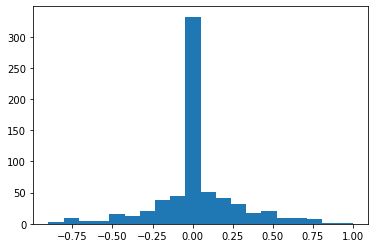

In [20]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=20)
plt.show()

In [21]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,doc,length,sentiment
473,We should have never developed LCDs beyond cal...,&gt;&gt;89325358&gt;you guys hate tech. and yo...,"(&, gt;&gt;89325358&gt;you, guys, hate, tech, ...",17,-0.8
633,What&#039;s/g/ opinion on Gropro cameras?,&gt;&gt;89325096why do they all have a fisheye...,"(&, gt;&gt;89325096why, do, they, all, have, a...",14,-0.8
642,&gt;13600K nearly matches the 5950X in renderi...,&gt;&gt;89325006I didn&#039;t decide /thread&g...,"(&, gt;&gt;89325006I, didn&#039;t, decide, /th...",6,-0.9
181,&gt;&gt;89219164Don&#039;t buy anything OTHER ...,&gt;&gt;89326874No. Bad. Don&#039;t buy what i...,"(&, gt;&gt;89326874No, ., Bad, ., Don&#039;t, ...",17,-0.7
489,What will swimming in ~60 degree water every o...,"&gt;&gt;89326841No, i meant 70F retardI said c...","(&, gt;&gt;89326841No, ,, i, meant, 70F, retar...",15,-0.6


In [22]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,doc,length,sentiment
501,Can you please help me choosing a good search ...,&gt;&gt;89318800&gt;Can you please help me cho...,"(&, gt;&gt;89318800&gt;Can, you, please, help,...",14,0.700
342,"Seriously, why wouldn&#039;t this work?",&gt;&gt;89324496&gt;thing gets warm by itself&...,"(&, gt;&gt;89324496&gt;thing, gets, warm, by, ...",26,0.550
248,&gt;UPGRADE &amp; BUILD ADVICEPost build list ...,"&gt;&gt;8932767964gb minimum for win 11, you m...","(&, gt;&gt;8932767964, gb, minimum, for, win, ...",22,0.800
659,What company makes cables and cords that work ...,&gt;&gt;89323725Lapp Kabel makes the best. But...,"(&, gt;&gt;89323725Lapp, Kabel, makes, the, be...",14,0.625
524,How is Java being used these days?Is it mostly...,&gt;&gt;89325646&gt;cancer behaves like cancer...,"(&, gt;&gt;89325646&gt;cancer, behaves, like, ...",32,0.700


In [23]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['doc'].apply(lambda x: nlp(x)._.blob.subjectivity)

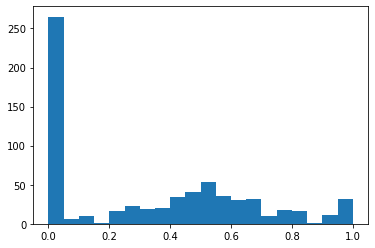

In [24]:
# lets plot the subjectivity of the comments
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [25]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
670,&gt;drm_kms_helper ERROR flip done timed outIs...,&gt;&gt;89322914&gt;Let’s take a look at you s...,"(&, gt;&gt;89322914&gt;Let, ’s, take, a, look,...",14,-0.800000,0.800000
584,"Well, /g/?","&gt;&gt;8932435410 mb is nothing, it does not ...","(&, gt;&gt;8932435410, mb, is, nothing, ,, it,...",28,-0.550000,0.600000
520,&gt;average Arch user,&gt;&gt;89326730You could post reddit memes 24...,"(&, gt;&gt;89326730You, could, post, reddit, m...",19,-0.400000,0.600000
266,FXsisters... we lost...,&gt;&gt;89324739I mean that&#039;s neat but ar...,"(&, gt;&gt;89324739I, mean, that&#039;s, neat,...",17,-0.312500,0.687500
480,&gt;&gt;89280321&quot;Arguing that you don&#03...,&gt;&gt;89325409You cant be sure unless you ca...,"(&, gt;&gt;89325409You, ca, nt, be, sure, unle...",18,0.212121,0.656145


In [26]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
636,&gt;nvmefags need water cooling to keep their ...,&gt;&gt;89325521&gt;need,"(&, gt;&gt;89325521&gt;need)",2,0.00,0.000000
509,&gt;be me&gt;been running 4k 55 inch QLED TVs ...,&gt;&gt;89321311&gt;I feel like a whore and I ...,"(&, gt;&gt;89321311&gt;I, feel, like, a, whore...",73,-0.13,0.313333
499,which is the best to learn about hacking and p...,&gt;&gt;89326796anything my brother in christe...,"(&, gt;&gt;89326796anything, my, brother, in, ...",11,0.00,0.000000
446,why do these buttons exist and why is the nump...,Home brings you back to your Mothership in Hom...,"(Home, brings, you, back, to, your, Mothership...",10,0.00,0.000000
280,Welcome to /fglt/ – Friendly GNU/Linux ThreadB...,I forgot to install networkmanager when settin...,"(I, forgot, to, install, networkmanager, when,...",68,0.00,0.000000


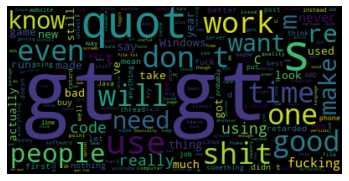

<Figure size 1440x720 with 0 Axes>

In [30]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

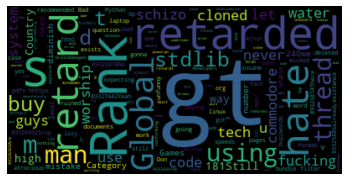

<Figure size 1440x720 with 0 Axes>

In [31]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [33]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())